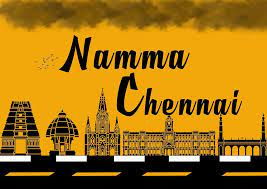


**Chennai House Price Prediction**

**Problem Statement**

Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?


**Data**

The historical sale data is available


**Minimum Requirements**

It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price. Also, it will be better to give a forecast range (range of permissible values) rather than a single estimate as it will help the customers to negotiate.

#MODELLING

##Importing libraries

In [153]:
!pip install colored

In [154]:
import pandas as pd
import numpy as np
import math
from termcolor import colored
from babel.numbers import format_currency


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

##getting dataset

In [155]:
#importing the rawa data set from github as df
df=pd.read_csv("https://raw.githubusercontent.com/HariKumarN14/Training-datasets/main/train-chennai-sale.csv")
df.head()

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P03210  Karapakkam      1004  04-05-2011            131        1.0   
1  P09411  Anna Nagar      1986  19-12-2006             26        2.0   
2  P01812       Adyar       909  04-02-2012             70        1.0   
3  P05346   Velachery      1855  13-03-2010             14        3.0   
4  P06210  Karapakkam      1226  05-10-2009             84        1.0   

   N_BATHROOM  N_ROOM SALE_COND PARK_FACIL  ... UTILITY_AVAIL  STREET MZZONE  \
0         1.0       3  AbNormal        Yes  ...        AllPub   Paved      A   
1         1.0       5  AbNormal         No  ...        AllPub  Gravel     RH   
2         1.0       3  AbNormal        Yes  ...           ELO  Gravel     RL   
3         2.0       5    Family         No  ...       NoSewr    Paved      I   
4         1.0       3  AbNormal        Yes  ...        AllPub  Gravel      C   

  QS_ROOMS QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  COMMIS  SALES_PRICE  
0      4.0         3.9         4.9       4.330   380000  144400      7600000  
1      4.9         4.2         2.5       3.765   760122  304049     21717770  
2      4.1         3.8         2.2       3.090   421094   92114     13159200  
3      4.7         3.9         3.6       4.010   356321   77042      9630290  
4      3.0         2.5         4.1       3.290   237000   74063      7406250  

[5 rows x 22 columns]

##EDA + data Cleaning

###cleaning

In [156]:
df.head()

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P03210  Karapakkam      1004  04-05-2011            131        1.0   
1  P09411  Anna Nagar      1986  19-12-2006             26        2.0   
2  P01812       Adyar       909  04-02-2012             70        1.0   
3  P05346   Velachery      1855  13-03-2010             14        3.0   
4  P06210  Karapakkam      1226  05-10-2009             84        1.0   

   N_BATHROOM  N_ROOM SALE_COND PARK_FACIL  ... UTILITY_AVAIL  STREET MZZONE  \
0         1.0       3  AbNormal        Yes  ...        AllPub   Paved      A   
1         1.0       5  AbNormal         No  ...        AllPub  Gravel     RH   
2         1.0       3  AbNormal        Yes  ...           ELO  Gravel     RL   
3         2.0       5    Family         No  ...       NoSewr    Paved      I   
4         1.0       3  AbNormal        Yes  ...        AllPub  Gravel      C   

  QS_ROOMS QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  COMMIS  SALES_PRICE  
0      4.0         3.9         4.9       4.330   380000  144400      7600000  
1      4.9         4.2         2.5       3.765   760122  304049     21717770  
2      4.1         3.8         2.2       3.090   421094   92114     13159200  
3      4.7         3.9         3.6       4.010   356321   77042      9630290  
4      3.0         2.5         4.1       3.290   237000   74063      7406250  

[5 rows x 22 columns]

In [157]:
df.shape

(7109, 22)

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [159]:
df.isna().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [160]:
#null values in Nbedroom and Nbathroom
#date datatype wrong
#change room dtype to int

In [161]:
mode_bath=df["N_BATHROOM"].mode()[0]
#avg_bath=math.floor(avg_bath)    #taking floor value
mode_bed=df["N_BEDROOM"].mode()[0]
#avg_bed=math.floor(avg_bath)


In [162]:
#filling nan with mean value(since its no: of rooms, better to do so than fill with 0)
df["N_BATHROOM"].fillna(mode_bath,inplace=True)  
df["N_BEDROOM"].fillna(mode_bed,inplace=True)



In [163]:
df.isna().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         0
N_BATHROOM        0
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [164]:
#changing datatypes
df["DATE_BUILD"]=pd.to_datetime(df["DATE_BUILD"])
df["DATE_SALE"]=pd.to_datetime(df["DATE_SALE"])
df["N_BEDROOM"]=df["N_BEDROOM"].astype(int)
df["N_BATHROOM"]=df["N_BATHROOM"].astype(int)

In [165]:
#creating new column for age of house
df["House_age"]=df["DATE_SALE"].dt.year-df["DATE_BUILD"].dt.year
df["House_age"]

0       44
1       11
2       20
3       22
4       30
        ..
7104    49
7105     9
7106    28
7107    32
7108    44
Name: House_age, Length: 7109, dtype: int64

In [166]:
#creating new column for total price
df["Total_price"]=df["REG_FEE"]+df["COMMIS"]+df["SALES_PRICE"]
df["Total_price"]

0        8124400
1       22781941
2       13672408
3       10063653
4        7717313
          ...   
7104     5668827
7105    11370222
7106     8835792
7107     9051448
7108    10405469
Name: Total_price, Length: 7109, dtype: int64

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PRT_ID         7109 non-null   object        
 1   AREA           7109 non-null   object        
 2   INT_SQFT       7109 non-null   int64         
 3   DATE_SALE      7109 non-null   datetime64[ns]
 4   DIST_MAINROAD  7109 non-null   int64         
 5   N_BEDROOM      7109 non-null   int64         
 6   N_BATHROOM     7109 non-null   int64         
 7   N_ROOM         7109 non-null   int64         
 8   SALE_COND      7109 non-null   object        
 9   PARK_FACIL     7109 non-null   object        
 10  DATE_BUILD     7109 non-null   datetime64[ns]
 11  BUILDTYPE      7109 non-null   object        
 12  UTILITY_AVAIL  7109 non-null   object        
 13  STREET         7109 non-null   object        
 14  MZZONE         7109 non-null   object        
 15  QS_ROOMS       7109 n

In [168]:
df["AREA"].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [169]:
#same places with different spelling,correct spelling
mappings={"Karapakam":"Karapakkam","Ana Nagar":"Anna Nagar","Ann Nagar":"Anna Nagar",
         "Adyr":"Adyar","Velchery":"Velachery","TNagar":"T Nagar",
         "Chrompt":"Chrompet","Chrmpet":"Chrompet","Chormpet":"Chrompet",
         "KKNagar":"KK Nagar"}
df["AREA"]=df["AREA"].replace(mappings)
df["AREA"].unique()


array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [170]:
df["SALE_COND"].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [171]:
#same sale condition with different spelling,correct spelling

mappings={"Ab Normal":"AbNormal","Partiall":"Partial","PartiaLl":"Partial",
          "Adj Land":"AdjLand"}
df['SALE_COND']=df['SALE_COND'].replace(mappings)

In [172]:
df["SALE_COND"].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

In [173]:

df["PARK_FACIL"].unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [174]:
#same park faciklity with different spelling,correct spelling
mappings={"Noo":"No"}

df["PARK_FACIL"]=df["PARK_FACIL"].replace(mappings)


In [175]:
df["PARK_FACIL"].unique()

array(['Yes', 'No'], dtype=object)

In [176]:
df["BUILDTYPE"].unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [177]:
#same buildtype with different spelling,correct spelling

mappings={"Comercial":"Commercial","Other":"Others"}

df["BUILDTYPE"]=df["BUILDTYPE"].replace(mappings)

In [178]:
df["BUILDTYPE"].unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [179]:
df["UTILITY_AVAIL"].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [180]:
#same utilityavail with different spelling,correct spelling

mappings={"AllPub":"All Pub","NoSeWa":"NoSewr","NoSewr ":"NoSewr"}

df["UTILITY_AVAIL"]=df["UTILITY_AVAIL"].replace(mappings)

In [181]:
df["UTILITY_AVAIL"].unique()

array(['All Pub', 'ELO', 'NoSewr'], dtype=object)

In [182]:
df["STREET"].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [183]:
#same street with different spelling,correct spelling

mappings={"Pavd":"Paved","NoAccess":"No Access"}

df["STREET"]=df["STREET"].replace(mappings)

In [184]:
df["STREET"].unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

###plotting

####Each column distribution

In [185]:
fig1=px.histogram(df,x="AREA",color="AREA",title="<b>AREA wise distribution of data<br>"+"              (no: of data per area)")
fig1

In [186]:
df["AREA"].value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [187]:
fig2=px.scatter(df,x="INT_SQFT",color="INT_SQFT",title="<b>Distribution of sqft")
fig2

In [188]:
fig3=px.scatter(df,x="DIST_MAINROAD",color="DIST_MAINROAD",title="<b>Distribution of distance from main road")
fig3

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



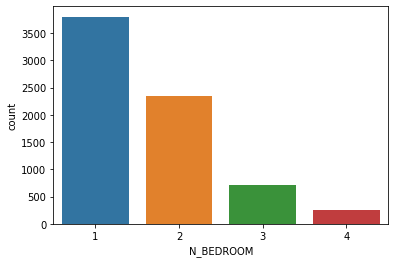

In [189]:
fig4=sns.countplot(df["N_BEDROOM"])
fig4


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



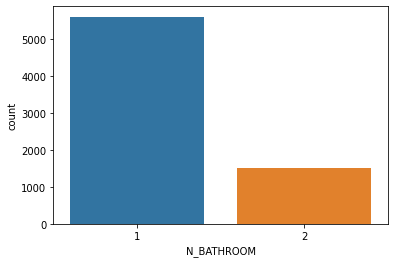

In [190]:
fig5=sns.countplot(df["N_BATHROOM"])
fig5

In [191]:
fig6=px.histogram(df,x="N_ROOM",color="N_ROOM",title="<b>Distribution of total number of rooms<br></b>"+"       (count of number of total rooms)")
fig6

In [192]:
value=df["SALE_COND"].value_counts()
name=df["SALE_COND"].unique()


fig7=px.pie(df,values=value,names=name,color=value,title="<b>Distribution of condition of sale")
fig7

In [193]:
value=df["PARK_FACIL"].value_counts()
name=df["PARK_FACIL"].unique()


fig8=px.pie(df,values=value,names=name,color=value,title="<b>Distribution of availability of parking")
fig8


In [194]:

fig9=px.histogram(df,x="BUILDTYPE",color="BUILDTYPE",title="<b>Distribution of number of bedrooms<br></b>"+"       (count of number of bed rooms)")
fig9

this is categorical data with no order, so will use one hot encoding

In [195]:
fig10=px.histogram(df,x="UTILITY_AVAIL",color="UTILITY_AVAIL",title="<b>Distribution of available utilities")
fig10

this is categorical data with no particular oreder,so will use one-hot encoding

In [196]:
fig11=px.histogram(df,x="STREET",color="STREET",title="<b>Distribution of type of streets")
fig11

this is categorical data with no particular oreder,so will use one-hot encoding

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



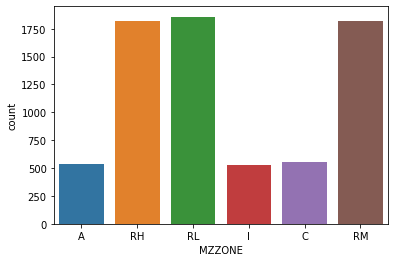

In [197]:
fig12=sns.countplot(df["MZZONE"])
fig12

In [198]:
fig13=px.scatter(df,x="Total_price",color="Total_price",title="<b>Distribution of total price</b>"+"(reg fee+sale price+commision+")
fig13

In [199]:

fig14=px.histogram(df,x="House_age",color="House_age",title="<b>Distribution of age of house</b>")
fig14

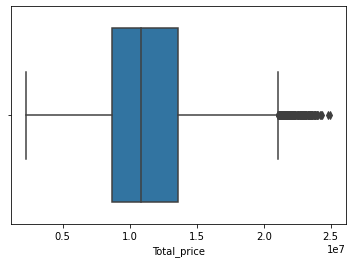

In [200]:
#check for outlier in total price column

outlier=sns.boxplot(x=df["Total_price"])

In [201]:
#correlation
corrmatrix=df.corr()
corrmatrix

INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM    N_ROOM  \
INT_SQFT       1.000000       0.002022   0.786263    0.515290  0.951279   
DIST_MAINROAD  0.002022       1.000000  -0.002723    0.001850  0.002301   
N_BEDROOM      0.786263      -0.002723   1.000000    0.755207  0.840209   
N_BATHROOM     0.515290       0.001850   0.755207    1.000000  0.568541   
N_ROOM         0.951279       0.002301   0.840209    0.568541  1.000000   
QS_ROOMS       0.019850       0.002237   0.014948    0.013376  0.016524   
QS_BATHROOM   -0.008337      -0.029468  -0.007534   -0.012043 -0.007545   
QS_BEDROOM     0.008865       0.001554   0.015752    0.013191  0.015072   
QS_OVERALL     0.014025      -0.017313   0.014282    0.007989  0.015459   
REG_FEE        0.657544       0.011600   0.455380    0.260244  0.630932   
COMMIS         0.571076       0.010994   0.430446    0.256726  0.533343   
SALES_PRICE    0.612125       0.018783   0.330987    0.108834  0.602760   
House_age     -0.012610      -0.003559  -0.045873   -0.020403 -0.033316   
Total_price    0.620010       0.018584   0.341300    0.118533  0.609345   

               QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL   REG_FEE  \
INT_SQFT       0.019850    -0.008337    0.008865    0.014025  0.657544   
DIST_MAINROAD  0.002237    -0.029468    0.001554   -0.017313  0.011600   
N_BEDROOM      0.014948    -0.007534    0.015752    0.014282  0.455380   
N_BATHROOM     0.013376    -0.012043    0.013191    0.007989  0.260244   
N_ROOM         0.016524    -0.007545    0.015072    0.015459  0.630932   
QS_ROOMS       1.000000     0.008828    0.007789    0.517741  0.019739   
QS_BATHROOM    0.008828     1.000000   -0.011745    0.551125 -0.006719   
QS_BEDROOM     0.007789    -0.011745    1.000000    0.630447  0.021526   
QS_OVERALL     0.517741     0.551125    0.630447    1.000000  0.022482   
REG_FEE        0.019739    -0.006719    0.021526    0.022482  1.000000   
COMMIS         0.009377    -0.000471    0.020118    0.017004  0.659903   
SALES_PRICE    0.021967    -0.011377    0.018804    0.020556  0.878148   
House_age      0.019718     0.021700   -0.017971    0.012562 -0.116322   
Total_price    0.021888    -0.011122    0.019146    0.020792  0.888335   

                 COMMIS  SALES_PRICE  House_age  Total_price  
INT_SQFT       0.571076     0.612125  -0.012610     0.620010  
DIST_MAINROAD  0.010994     0.018783  -0.003559     0.018584  
N_BEDROOM      0.430446     0.330987  -0.045873     0.341300  
N_BATHROOM     0.256726     0.108834  -0.020403     0.118533  
N_ROOM         0.533343     0.602760  -0.033316     0.609345  
QS_ROOMS       0.009377     0.021967   0.019718     0.021888  
QS_BATHROOM   -0.000471    -0.011377   0.021700    -0.011122  
QS_BEDROOM     0.020118     0.018804  -0.017971     0.019146  
QS_OVERALL     0.017004     0.020556   0.012562     0.020792  
REG_FEE        0.659903     0.878148  -0.116322     0.888335  
COMMIS         1.000000     0.626275  -0.089556     0.642178  
SALES_PRICE    0.626275     1.000000  -0.118842     0.999649  
House_age     -0.089556    -0.118842   1.000000    -0.119536  
Total_price    0.642178     0.999649  -0.119536     1.000000

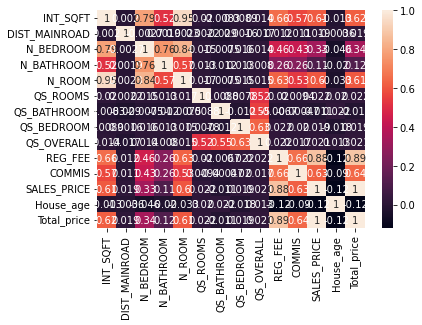

In [202]:
heat=sns.heatmap(corrmatrix,annot=True)
heat

####feature vs target plots

In [203]:
#creating a dataframe with area and average sale price
x=pd.DataFrame(df.groupby("AREA")['Total_price'].mean())
y=df["AREA"].unique()
y=sorted(y)

data={"Area":y,"Average_price":x["Total_price"]}
temp=pd.DataFrame(data)
temp.sort_values('Average_price',inplace=True)


In [204]:
fig1=px.bar(temp,x="Area",y="Average_price",color="Area",title="<b>AREA vs Average price<br>")
fig1

interpretation: 

1.AREA and Total Price has a liner relation.

2.This feature can be selected for predicting total price

3.Since there is linear relation, we can label label encode this categorical data in the order: Karapakkam,Adyar,Chrompet,Velachery,KK Nagar,Anna Nagar,T Nagar


In [205]:
fig2=px.scatter(df,x="INT_SQFT",y="Total_price",color="INT_SQFT",title="<b>Total price vs sqft")
fig2

In [206]:
#will group int sqft into groups of 500 , to see the relation better
aa = [df.loc[(df.INT_SQFT > i) & (df.INT_SQFT < (i+500)),'Total_price'].mean() for i in range(0,2500,500)]
aa

[nan,
 8352235.560177482,
 10265168.884538153,
 13607807.808228731,
 15006524.014251782]

Text(0.5, 1.0, 'DDist Mainroad vs Price')

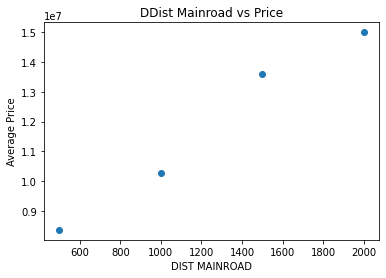

In [207]:
import matplotlib.pyplot as plt
plt.scatter(x = list(range(0,2500,500)), y = aa)
plt.xlabel('DIST MAINROAD')
plt.ylabel('Average Price')
plt.title('DDist Mainroad vs Price')

Interpretation:

1.There is clear linear relation between INT_SQFT and Total_price

2.this feature can be selected for predicting Total price

In [208]:
fig3=px.scatter(df,x="DIST_MAINROAD",y="Total_price",color="DIST_MAINROAD",title="<b>price vs  distance from main road")
fig3

Text(0.5, 1.0, 'DDist Mainroad vs Price')

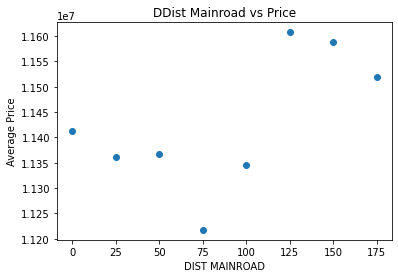

In [209]:
#grouping and plotting to see if there is any relation
a = [df.loc[(df.DIST_MAINROAD > i) & (df.DIST_MAINROAD < (i+25)),'Total_price'].mean() for i in range(0,200,25)]

import matplotlib.pyplot as plt
plt.scatter(x = list(range(0,200,25)), y = a)
plt.xlabel('DIST MAINROAD')
plt.ylabel('Average Price')
plt.title('DDist Mainroad vs Price')

Interpretation:

1.Ther is no clear relation between DIST_MAINROAD and Total price

2.This feature can be dropped or not taken into consideration for poredicting Total price

In [210]:
#creating a dataframe with no: of bedroom and average sale price
x3=pd.DataFrame(df.groupby("N_BEDROOM")['Total_price'].mean())
y3=df["N_BEDROOM"].unique()
y3=sorted(y3)

data3={"N_BEDROOM":y3,"Average_price":x3["Total_price"]}
temp3=pd.DataFrame(data3)
temp3

N_BEDROOM  Average_price
N_BEDROOM                          
1                  1   1.022734e+07
2                  2   1.239016e+07
3                  3   1.313775e+07
4                  4   1.527924e+07

In [211]:
fig4=px.bar(temp3,x="N_BEDROOM",y="Average_price",color="N_BEDROOM",title="<b>No: of Bedrooms  vs Average price<br>")
fig4

Interpretation:

1.There is clear linear relation between N_BEDROOM and Total_price

2.this feature can be selected for predicting Total price

In [212]:
#creating a dataframe with no: of bathroom and average sale price
x2=pd.DataFrame(df.groupby("N_BATHROOM")['Total_price'].mean())
y2=df["N_BATHROOM"].unique()
y2=sorted(y2)

data2={"N_BATHROOM":y2,"Average_price":x2["Total_price"]}
temp2=pd.DataFrame(data2)
#temp2

In [213]:
fig5=px.bar(temp2,x="N_BATHROOM",y="Average_price",color="N_BATHROOM",title="<b>No: of Bathrooms  vs Average price<br>")
fig5

Interpretation:

1.There is just 2 categories and little difference in total price, showing not much relation between N_BATHROOM and Total price

2.correlation is too low(0.11),from corr matrix

3.this feature need NOT be considered for predicting Total price

In [214]:
#creating a dataframe with no: of rooms and average sale price
x4=pd.DataFrame(df.groupby("N_ROOM")['Total_price'].mean())
y4=df["N_ROOM"].unique()
y4=sorted(y4)

data4={"N_ROOM":y4,"Average_price":x4["Total_price"]}
temp4=pd.DataFrame(data4)
#temp4

In [215]:
fig6=px.bar(temp4,x="N_ROOM",y="Average_price",color="N_ROOM",title="<b>No: of Total rooms  vs Average price<br>")
fig6

Interpretation:

1.There is clear linear relation between N_ROOM and Total_price

2.this feature can be selected for predicting Total price

In [216]:
#creating a dataframe with sale condition and average sale price
x=pd.DataFrame(df.groupby("SALE_COND")['Total_price'].mean())
y=df["SALE_COND"].unique()
y=sorted(y)

data={"SALE_COND":y,"Average_price":x["Total_price"]}
temp=pd.DataFrame(data)
temp.sort_values("Average_price",inplace=True)

In [217]:
fig7=px.bar(temp,x="SALE_COND",y="Average_price",color="SALE_COND",title="<b>Sale condition  vs Average price<br>")
fig7

Interpretation:

1.There is no clear variation inprice with different sale conidtion or the difference in price is minial

2.this feature need NOT be selected for predicting Total price

In [218]:
#creating a dataframe with PARK_FACIL and average sale price
x=pd.DataFrame(df.groupby("PARK_FACIL")['Total_price'].mean())
y=df["PARK_FACIL"].unique()
y=sorted(y)

data={"PARK_FACIL":y,"Average_price":x["Total_price"]}
temp=pd.DataFrame(data)
#temp

fig8=px.bar(temp,x="PARK_FACIL",y="Average_price",color="PARK_FACIL",title="<b>Parking facility  vs Average price<br>")
fig8


Interpretation:

1.There is a linear relation between PARK_FACILITY and Total_price

2.this feature can be selected for predicting Total price

3.Since thise is a binary categorical data, we can use label encoding as 

YES:1 and NO:0

In [219]:
#creating a dataframe with BUILDTYPE and average sale price
x=pd.DataFrame(df.groupby("BUILDTYPE")['Total_price'].mean())
y=df["BUILDTYPE"].unique()
y=sorted(y)

data={"BUILDTYPE":y,"Average_price":x["Total_price"]}
temp=pd.DataFrame(data)
temp.sort_values("Average_price",inplace=True)

fig9=px.bar(temp,x="BUILDTYPE",y="Average_price",color="BUILDTYPE",title="<b>Building Type  vs Average price<br>")
fig9

Interpretation:

1.There is a linear relation between BUILDTYPE and Total_price

2.this feature can be selected for predicting Total price

3.Since thise is a multiple categorical data, with no specific order, we can one-hot encoding

In [220]:
#creating a dataframe with utilities available and average sale price
x=pd.DataFrame(df.groupby("UTILITY_AVAIL")['Total_price'].mean())
y=df["UTILITY_AVAIL"].unique()
y=sorted(y)

data={"UTILITY_AVAIL":y,"Average_price":x["Total_price"]}
temp=pd.DataFrame(data)
temp.sort_values("Average_price",inplace=True)

fig10=px.bar(temp,x="UTILITY_AVAIL",y="Average_price",color="UTILITY_AVAIL",title="<b>Utilities Available  vs Average price<br>")
fig10

Interpretation:

1.There is no clear variation in price with different utility avail or the difference in price is minimal

2.this feature need NOT be selected for predicting Total price

In [221]:
#creating a dataframe with street and average sale price
x=pd.DataFrame(df.groupby("STREET")['Total_price'].mean())
y=df["STREET"].unique()
y=sorted(y)

data={"STREET":y,"Average_price":x["Total_price"]}
temp=pd.DataFrame(data)
temp.sort_values("Average_price",inplace=True)

fig11=px.bar(temp,x="STREET",y="Average_price",color="STREET",title="<b> Street type  vs Average price<br>")
fig11

Interpretation:

1.There is no clear variation in price with different street or the difference in price is minimal

2.this feature need NOT be selected for predicting Total price

In [222]:
#creating a dataframe with age of house and average sale price
x=pd.DataFrame(df.groupby("House_age")['Total_price'].mean())
y=df["House_age"].unique()
y=sorted(y)

data={"House_age":y,"Average_price":x["Total_price"]}
temp=pd.DataFrame(data)
temp
fig12=px.bar(temp,x="House_age",y="Average_price",color="House_age",title="<b>Age of house  vs Average price<br>")
fig12

Interpretation:

1.There is no linear relation between age of house and  total price

2.this feature need NOT be selected for predicting Total price

In [223]:
#creating a dataframe with age of house and average sale price
x=pd.DataFrame(df.groupby("MZZONE")['Total_price'].mean())
y=df["MZZONE"].unique()
y=sorted(y)

data={"MZZONE":y,"Average_price":x["Total_price"]}
temp=pd.DataFrame(data)
temp
fig13=px.bar(temp,x="MZZONE",y="Average_price",color="MZZONE",title="<b>MzZone  vs Average price<br>")
fig13

interpretation: 

1.MZZONE and Total Price has a liner relation.

2.This feature can be selected for predicting total price

3.Since there is linear relation, we can label label encode this categorical data in the order: A,C,I,RH,RL,RM


**Interpreting all the graphs, plotting each feature vs the target Total_price, the features selected for predicting the price are:**

**AREA, INT_SQFT, N_BEDROOM, N_ROOM, PARK_FACIL, BUILDTYPE, MZZONE**



##ML model build

In [224]:
data=df
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PRT_ID         7109 non-null   object        
 1   AREA           7109 non-null   object        
 2   INT_SQFT       7109 non-null   int64         
 3   DATE_SALE      7109 non-null   datetime64[ns]
 4   DIST_MAINROAD  7109 non-null   int64         
 5   N_BEDROOM      7109 non-null   int64         
 6   N_BATHROOM     7109 non-null   int64         
 7   N_ROOM         7109 non-null   int64         
 8   SALE_COND      7109 non-null   object        
 9   PARK_FACIL     7109 non-null   object        
 10  DATE_BUILD     7109 non-null   datetime64[ns]
 11  BUILDTYPE      7109 non-null   object        
 12  UTILITY_AVAIL  7109 non-null   object        
 13  STREET         7109 non-null   object        
 14  MZZONE         7109 non-null   object        
 15  QS_ROOMS       7109 n

In [225]:
print(data["AREA"].unique())
print(data["PARK_FACIL"].unique())

['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'T Nagar']
['Yes' 'No']


In [226]:
#Encoding catagorical data

#Label encoding

from sklearn import preprocessing
label_encode=preprocessing.LabelEncoder()

#label starts from 0 in alphabetical order
data["AREA"]=label_encode.fit_transform(data["AREA"])
data["PARK_FACIL"]=label_encode.fit_transform(data["PARK_FACIL"]) 



In [227]:
print(data["AREA"].unique())
print(data["PARK_FACIL"].unique())

[4 1 0 6 2 3 5]
[1 0]


In [228]:
#Encoding catagorical data

#one-hot encoding

data=pd.get_dummies(data,columns=['BUILDTYPE','MZZONE']  )
  




In [229]:
data.head()

PRT_ID  AREA  INT_SQFT  DATE_SALE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  \
0  P03210     4      1004 2011-04-05            131          1           1   
1  P09411     1      1986 2006-12-19             26          2           1   
2  P01812     0       909 2012-04-02             70          1           1   
3  P05346     6      1855 2010-03-13             14          3           2   
4  P06210     4      1226 2009-05-10             84          1           1   

   N_ROOM SALE_COND  PARK_FACIL  ... Total_price BUILDTYPE_Commercial  \
0       3  AbNormal           1  ...     8124400                    1   
1       5  AbNormal           0  ...    22781941                    1   
2       3  AbNormal           1  ...    13672408                    1   
3       5    Family           0  ...    10063653                    0   
4       3  AbNormal           1  ...     7717313                    0   

  BUILDTYPE_House  BUILDTYPE_Others  MZZONE_A  MZZONE_C  MZZONE_I  MZZONE_RH  \
0               0                 0         1         0         0          0   
1               0                 0         0         0         0          1   
2               0                 0         0         0         0          0   
3               0                 1         0         0         1          0   
4               0                 1         0         1         0          0   

   MZZONE_RL  MZZONE_RM  
0          0          0  
1          0          0  
2          1          0  
3          0          0  
4          0          0  

[5 rows x 31 columns]

###LInear Regression

In [230]:
#setting features and target( x and y)
x=data[["AREA","INT_SQFT","N_BEDROOM","N_ROOM","PARK_FACIL","BUILDTYPE_Commercial","BUILDTYPE_House","BUILDTYPE_Others",
        "MZZONE_A","MZZONE_C","MZZONE_I","MZZONE_RH","MZZONE_RL","MZZONE_RM"]].values
y=data["Total_price"].values


In [231]:
#splitting training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [232]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [233]:
#Build model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [234]:
#checcking model coefficients
print(model.intercept_)
print(model.coef_)

11460282.555064308
[ -544824.43256514  2064353.05166431 -1577608.99210322  1739474.56911402
   559920.13171876  1422321.28266296  -888345.83560719  -539459.11299901
  -588358.45670364  -447392.8579039   -269174.20695731   -31649.79315652
   259657.55603852   557317.44784049]


In [235]:
#testing using test data
price_pred=model.predict(x_test)


In [236]:
#view metrics and score 
from sklearn import metrics 
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,price_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,price_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,price_pred)))

#score
print("\n Accuracy:",model.score(x_test,y_test)*100,"%")


Mean Absolute Error: 950504.3211115153
Mean Squared Error: 1528357831153.1023
Root Mean Squared Error: 1236267.7020585397

 Accuracy: 89.68517043168791 %


In [237]:
error=metrics.mean_absolute_error(y_test, price_pred)
#print(error)
mean=data["Total_price"].mean()
mean
per=(error/mean)*100
per

8.328366825624961

In [238]:
model.predict([[4,1004,1,3,1,1,0,0,1,0,0,0,0,0]])

array([2.08692615e+09])

###Polynomial Regression

In [239]:
data.head()

PRT_ID  AREA  INT_SQFT  DATE_SALE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  \
0  P03210     4      1004 2011-04-05            131          1           1   
1  P09411     1      1986 2006-12-19             26          2           1   
2  P01812     0       909 2012-04-02             70          1           1   
3  P05346     6      1855 2010-03-13             14          3           2   
4  P06210     4      1226 2009-05-10             84          1           1   

   N_ROOM SALE_COND  PARK_FACIL  ... Total_price BUILDTYPE_Commercial  \
0       3  AbNormal           1  ...     8124400                    1   
1       5  AbNormal           0  ...    22781941                    1   
2       3  AbNormal           1  ...    13672408                    1   
3       5    Family           0  ...    10063653                    0   
4       3  AbNormal           1  ...     7717313                    0   

  BUILDTYPE_House  BUILDTYPE_Others  MZZONE_A  MZZONE_C  MZZONE_I  MZZONE_RH  \
0               0                 0         1         0         0          0   
1               0                 0         0         0         0          1   
2               0                 0         0         0         0          0   
3               0                 1         0         0         1          0   
4               0                 1         0         1         0          0   

   MZZONE_RL  MZZONE_RM  
0          0          0  
1          0          0  
2          1          0  
3          0          0  
4          0          0  

[5 rows x 31 columns]

In [240]:
data.loc[0]

PRT_ID                               P03210
AREA                                      4
INT_SQFT                               1004
DATE_SALE               2011-04-05 00:00:00
DIST_MAINROAD                           131
N_BEDROOM                                 1
N_BATHROOM                                1
N_ROOM                                    3
SALE_COND                          AbNormal
PARK_FACIL                                1
DATE_BUILD              1967-05-15 00:00:00
UTILITY_AVAIL                       All Pub
STREET                                Paved
QS_ROOMS                                4.0
QS_BATHROOM                             3.9
QS_BEDROOM                              4.9
QS_OVERALL                             4.33
REG_FEE                              380000
COMMIS                               144400
SALES_PRICE                         7600000
House_age                                44
Total_price                         8124400
BUILDTYPE_Commercial            

In [241]:
#setting features and target( x and y)
x=data[["AREA","INT_SQFT","N_BEDROOM","N_ROOM","PARK_FACIL","BUILDTYPE_Commercial","BUILDTYPE_House","BUILDTYPE_Others",
        "MZZONE_A","MZZONE_C","MZZONE_I","MZZONE_RH","MZZONE_RL","MZZONE_RM"]].values
y=data["Total_price"].values

In [242]:
#splitting training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [243]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [244]:
#Build model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=4)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.fit_transform(x_test)
model_poly=LinearRegression()
model_poly.fit(x_train_poly,y_train)

LinearRegression()

In [245]:
#checcking model coefficients
print(model_poly.intercept_)
print(model_poly.coef_)

-1.0227205268077027e+17
[-8.42463281e+12 -1.45952433e+16  1.31262842e+16 ... -2.91533817e+14
 -4.37774360e+15  1.50064014e+16]


In [246]:
#testing using test data
price_pred=model_poly.predict(x_test_poly)

In [247]:
#view metrics and score 
from sklearn import metrics 
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,price_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,price_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,price_pred)))

#score
print("\n Accuracy:",model_poly.score(x_test_poly,y_test)*100,"%")


Mean Absolute Error: 504454.39756211906
Mean Squared Error: 380379779885.9775
Root Mean Squared Error: 616749.3655335022

 Accuracy: 97.43283115983662 %


In [248]:
error=metrics.mean_absolute_error(y_test,price_pred)
print(error)
mean=data["Total_price"].mean()
mean
per=(error/mean)*100
per

504454.39756211906


4.420054887056189

In [249]:
model_poly.predict(poly.fit_transform([[4,1004,1,3,1,1,0,0,1,0,0,0,0,0]]))

array([-1.16040733e+24])

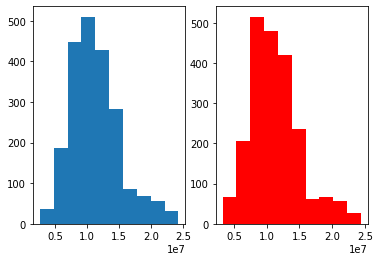

In [250]:
plt.figure
fig=plt.subplot(121)
fig=plt.hist(y_test)
fig=plt.subplot(122)
fig=plt.hist(price_pred,color="r")

In [251]:
data.head()

PRT_ID  AREA  INT_SQFT  DATE_SALE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  \
0  P03210     4      1004 2011-04-05            131          1           1   
1  P09411     1      1986 2006-12-19             26          2           1   
2  P01812     0       909 2012-04-02             70          1           1   
3  P05346     6      1855 2010-03-13             14          3           2   
4  P06210     4      1226 2009-05-10             84          1           1   

   N_ROOM SALE_COND  PARK_FACIL  ... Total_price BUILDTYPE_Commercial  \
0       3  AbNormal           1  ...     8124400                    1   
1       5  AbNormal           0  ...    22781941                    1   
2       3  AbNormal           1  ...    13672408                    1   
3       5    Family           0  ...    10063653                    0   
4       3  AbNormal           1  ...     7717313                    0   

  BUILDTYPE_House  BUILDTYPE_Others  MZZONE_A  MZZONE_C  MZZONE_I  MZZONE_RH  \
0               0                 0         1         0         0          0   
1               0                 0         0         0         0          1   
2               0                 0         0         0         0          0   
3               0                 1         0         0         1          0   
4               0                 1         0         1         0          0   

   MZZONE_RL  MZZONE_RM  
0          0          0  
1          0          0  
2          1          0  
3          0          0  
4          0          0  

[5 rows x 31 columns]

###SVM

In [252]:
data.head()

PRT_ID  AREA  INT_SQFT  DATE_SALE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  \
0  P03210     4      1004 2011-04-05            131          1           1   
1  P09411     1      1986 2006-12-19             26          2           1   
2  P01812     0       909 2012-04-02             70          1           1   
3  P05346     6      1855 2010-03-13             14          3           2   
4  P06210     4      1226 2009-05-10             84          1           1   

   N_ROOM SALE_COND  PARK_FACIL  ... Total_price BUILDTYPE_Commercial  \
0       3  AbNormal           1  ...     8124400                    1   
1       5  AbNormal           0  ...    22781941                    1   
2       3  AbNormal           1  ...    13672408                    1   
3       5    Family           0  ...    10063653                    0   
4       3  AbNormal           1  ...     7717313                    0   

  BUILDTYPE_House  BUILDTYPE_Others  MZZONE_A  MZZONE_C  MZZONE_I  MZZONE_RH  \
0               0                 0         1         0         0          0   
1               0                 0         0         0         0          1   
2               0                 0         0         0         0          0   
3               0                 1         0         0         1          0   
4               0                 1         0         1         0          0   

   MZZONE_RL  MZZONE_RM  
0          0          0  
1          0          0  
2          1          0  
3          0          0  
4          0          0  

[5 rows x 31 columns]

In [253]:
#setting features and target( x and y)
x=data[["AREA","INT_SQFT","N_BEDROOM","N_ROOM","PARK_FACIL","BUILDTYPE_Commercial","BUILDTYPE_House","BUILDTYPE_Others",
        "MZZONE_A","MZZONE_C","MZZONE_I","MZZONE_RH","MZZONE_RL","MZZONE_RM"]].values
y=data["Total_price"].values

In [254]:
#splitting training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [255]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [256]:
#Build model
from sklearn import svm
model=svm.SVR(kernel='linear',gamma='scale')
model.fit(x_train,y_train)

SVR(kernel='linear')

In [257]:
#checcking model coefficients
print(model.intercept_)
print(model.coef_)

[10850899.52247357]
[[    5.43276935  2761.50654356  1618.82934909  2697.03032272
    528.02883271  2238.40366611 -1527.45734805  -717.59371244
   -972.45674288  -959.26338894  -771.88321413   107.33333619
    593.30935901   929.78001277]]


In [258]:
#view metrics and score 
from sklearn import metrics 
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,price_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,price_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,price_pred)))

#score
print("\n Accuracy:",model.score(x_test,y_test)*100,"%")


Mean Absolute Error: 504454.39756211906
Mean Squared Error: 380379779885.9775
Root Mean Squared Error: 616749.3655335022

 Accuracy: -1.029789519408486 %


In [259]:
error=metrics.mean_absolute_error(y_test, price_pred)
#print(error)
mean=data["Total_price"].mean()
mean
per=(error/mean)*100
per

4.420054887056189

In [260]:
model.predict([[4,1004,1,3,1,1,0,0,1,0,0,0,0,0]])

array([13634977.7193588])

###DecisionTree Regressor

In [261]:
data.head()

PRT_ID  AREA  INT_SQFT  DATE_SALE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  \
0  P03210     4      1004 2011-04-05            131          1           1   
1  P09411     1      1986 2006-12-19             26          2           1   
2  P01812     0       909 2012-04-02             70          1           1   
3  P05346     6      1855 2010-03-13             14          3           2   
4  P06210     4      1226 2009-05-10             84          1           1   

   N_ROOM SALE_COND  PARK_FACIL  ... Total_price BUILDTYPE_Commercial  \
0       3  AbNormal           1  ...     8124400                    1   
1       5  AbNormal           0  ...    22781941                    1   
2       3  AbNormal           1  ...    13672408                    1   
3       5    Family           0  ...    10063653                    0   
4       3  AbNormal           1  ...     7717313                    0   

  BUILDTYPE_House  BUILDTYPE_Others  MZZONE_A  MZZONE_C  MZZONE_I  MZZONE_RH  \
0               0                 0         1         0         0          0   
1               0                 0         0         0         0          1   
2               0                 0         0         0         0          0   
3               0                 1         0         0         1          0   
4               0                 1         0         1         0          0   

   MZZONE_RL  MZZONE_RM  
0          0          0  
1          0          0  
2          1          0  
3          0          0  
4          0          0  

[5 rows x 31 columns]

In [262]:
#setting features and target( x and y)
x=data[["AREA","INT_SQFT","N_BEDROOM","N_ROOM","PARK_FACIL","BUILDTYPE_Commercial","BUILDTYPE_House","BUILDTYPE_Others",
        "MZZONE_A","MZZONE_C","MZZONE_I","MZZONE_RH","MZZONE_RL","MZZONE_RM"]].values
y=data["Total_price"].values

In [263]:
#splitting training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [264]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [265]:
#Build model
from sklearn.tree import DecisionTreeRegressor
model_regressor1 = DecisionTreeRegressor()
model_regressor1.fit(x_train, y_train)

DecisionTreeRegressor()

In [266]:
#testing using test data
y_pred = model_regressor1.predict(x_test)

In [267]:
#comparing test and predicted
df1=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df1

Actual   Predicted
0     13951324  14384053.0
1     13538884  13457409.0
2     20004028  20393118.0
3      5189490   6472605.0
4     14035224  13364585.0
...        ...         ...
2128   7946771   8893037.0
2129   9744287   8532226.0
2130  14199569  14833984.0
2131   8995769   9274505.0
2132   6926853   7803840.0

[2133 rows x 2 columns]

In [268]:
#view metrics and score 

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#score
print("\n Accuracy:",model_regressor1.score(x_test,y_test)*100,"%")



Mean Absolute Error: 709184.8476324426
Mean Squared Error: 817394112100.7025
Root Mean Squared Error: 904098.5079628782

 Accuracy: 94.48343785427568 %


In [269]:
error=metrics.mean_absolute_error(y_test, y_pred)
print(error)
mean=data["Total_price"].mean()
print(mean)
per=(error/mean)*100
per

709184.8476324426
11412853.69644113


6.213913421615032

The mean absolute error for our algorithm is 711526.3274730426, 

which is less than 10 percent of the mean of all the values in the 'Total_price' column (11412853.69644113).
 
 This means that our algorithm did a fine prediction job.

In [270]:
model_regressor1.predict([[4,1004,1,3,1,1,0,0,1,0,0,0,0,0]])

array([16447690.])

Visualising decision tree regressor

In [271]:
!pip install dtreeviz

In [272]:
from sklearn import tree
from dtreeviz.trees import *
import graphviz 
features=pd.DataFrame(x)
fig = plt.figure(figsize=(25,20))
regr= tree.DecisionTreeRegressor(max_depth=3)  
regr.fit(x,y)
viz = dtreeviz(regr,
               x,
               y,
               target_name='Total_price',
               feature_names=features.columns,
               title="Price prediction",
               fontname="Arial",
               colors = {"title":"purple"},
               scale=1.5)
viz

<Figure size 1800x1440 with 0 Axes>

###RandomForest

In [273]:
#setting features and target( x and y)
x=data[["AREA","INT_SQFT","N_BEDROOM","N_ROOM","PARK_FACIL","BUILDTYPE_Commercial","BUILDTYPE_House","BUILDTYPE_Others",
        "MZZONE_A","MZZONE_C","MZZONE_I","MZZONE_RH","MZZONE_RL","MZZONE_RM"]].values
y=data["Total_price"].values

In [274]:
#splitting training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [275]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [276]:
#Build model
from sklearn.ensemble import RandomForestRegressor
model_regressor2 = RandomForestRegressor(n_estimators=5,random_state=0)
model_regressor2.fit(x_train, y_train)

RandomForestRegressor(n_estimators=5, random_state=0)

In [277]:
#testing using test data
y_pred = model_regressor2.predict(x_test)

In [278]:
#comparing test and predicted
df1=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df1.head()

Actual   Predicted
0  13951324  14278507.2
1  13538884  13457409.0
2  20004028  20379609.2
3   5189490   6398811.2
4  14035224  13857997.6

In [279]:
#view metrics and score 

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#score
print("\n Accuracy:",model_regressor2.score(x_test,y_test)*100,"%")



Mean Absolute Error: 613740.6097905923
Mean Squared Error: 580008813508.7557
Root Mean Squared Error: 761583.0969163876

 Accuracy: 96.0855423137735 %


In [280]:
RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(RMSE)
mean=data["Total_price"].mean()
per=(error/mean)*100
per

761583.0969163876


6.213913421615032

In [281]:
model_regressor2.predict([[4,1004,1,3,1,1,0,0,1,0,0,0,0,0]])

array([17463702.])

In [282]:
#feature importance
t=pd.DataFrame(x_train)
feature_scores = pd.Series(model_regressor2.feature_importances_, index=t.columns).sort_values(ascending=False)

feature_scores

1     0.447310
5     0.309809
0     0.122046
2     0.053077
4     0.015857
13    0.015067
8     0.008985
3     0.006558
12    0.005143
11    0.004622
9     0.004122
6     0.003227
7     0.002560
10    0.001618
dtype: float64

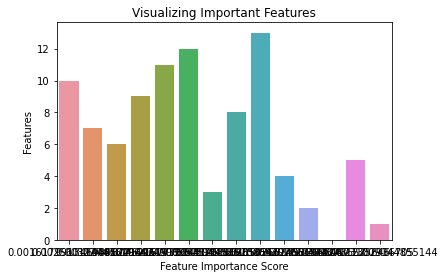

In [283]:

# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')

# Add title to the graph

plt.title("Visualizing Important Features")

# Visualize the graph

plt.show()

###Gradient boosting

In [284]:
#setting features and target( x and y)
x=data[["AREA","INT_SQFT","N_BEDROOM","N_ROOM","PARK_FACIL","BUILDTYPE_Commercial","BUILDTYPE_House","BUILDTYPE_Others",
        "MZZONE_A","MZZONE_C","MZZONE_I","MZZONE_RH","MZZONE_RL","MZZONE_RM"]].values
y=data["Total_price"].values

In [285]:
#splitting training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [286]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [287]:
#Build model


from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

tree = DecisionTreeRegressor()
bagging_model = BaggingRegressor(base_estimator=tree, n_estimators=1500, random_state=42)
bagging_model.fit(x_train, y_train)



BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=1500,
                 random_state=42)

In [288]:
#testing using test data
y_pred = bagging_model.predict(x_test)

In [289]:
#comparing test and predicted
df1=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df1.head()

Actual     Predicted
0  13951324  1.433659e+07
1  13538884  1.324234e+07
2  20004028  2.013244e+07
3   5189490  5.594997e+06
4  14035224  1.411669e+07

In [290]:
#view metrics and score 

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))



Mean Absolute Error: 580919.015567332
Mean Squared Error: 520599534604.77606
Root Mean Squared Error: 721525.8377943066


In [291]:
#score
print("\n Accuracy:",bagging_model.score(x_test,y_test)*100,"%")


 Accuracy: 96.48649330455589 %


In [292]:
RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(RMSE)
mean=data["Total_price"].mean()
per=(error/mean)*100
per

721525.8377943066


6.213913421615032

In [293]:
data.loc[0]

PRT_ID                               P03210
AREA                                      4
INT_SQFT                               1004
DATE_SALE               2011-04-05 00:00:00
DIST_MAINROAD                           131
N_BEDROOM                                 1
N_BATHROOM                                1
N_ROOM                                    3
SALE_COND                          AbNormal
PARK_FACIL                                1
DATE_BUILD              1967-05-15 00:00:00
UTILITY_AVAIL                       All Pub
STREET                                Paved
QS_ROOMS                                4.0
QS_BATHROOM                             3.9
QS_BEDROOM                              4.9
QS_OVERALL                             4.33
REG_FEE                              380000
COMMIS                               144400
SALES_PRICE                         7600000
House_age                                44
Total_price                         8124400
BUILDTYPE_Commercial            

In [294]:
bagging_model.predict([[4,1004,1,3,1,1,0,0,1,0,0,0,0,0]])

array([16919467.09466667])

##Model Selection

Analysing the accuracy,errors in all models, Random Forest gives the best accuracy and lower error.
So selecting the random forest regressor as the ML model for predicting the housing prices


In [295]:
MODEL=model_regressor2

In [296]:
#score
print("\n Accuracy:",MODEL.score(x_test,y_test)*100,"%")


 Accuracy: 96.0855423137735 %


In [297]:
MODEL.predict([[4,1004,1,3,1,1,0,0,1,0,0,0,0,0]])

array([17463702.])

Pickling the model

In [298]:
import pickle

pickle.dump(MODEL,open('Chennai.pkl','wb'))

In [299]:
try_model=pickle.load(open('Chennai.pkl','rb'))   #loading the pickled model to check if it works

In [300]:
try_model.predict([[4,1004,1,3,1,1,0,0,1,0,0,0,0,0]]) #predicting to see if the model is pickled properly

array([17463702.])

#PREDICTION

To make the prediction more reliable, a 5% buffer will be provided on either side and a range of value will be suggetsed.
ie; 5%+- preicted value

In [301]:
print(colored("                           Choose the features to predict the price",'green',attrs=['bold']))

print(colored("Select the Area of your preference:    (select the number corresponding to the area)",'blue'))
Area=input("\n0.Adyar\n1.Anna Nagar\n2.Chrompet\n3.karapakkam\n4.KK Nagar\n5.T Nagar\n6.Velachery        \n")

print(colored("Enter the area in sqft of your preference:    (eg: 250,500,1200)",'blue'))
int_sqft=int(input("  sqft"))

print(colored("Enter the number of Bedrooms of your preference:    ",'blue'))
n_bed=int(input("   "))

print(colored("Enter the total number of rooms of your preference:    ",'blue'))
n_room=int(input("   "))

print(colored("Do you need parking facility:    (Enter 1 for Yes and 0 for No )",'blue'))
park=int(input("   "))

print(colored("Enter the type of building of your preference:    (select the number corresponding to the area)",'blue'))
buildtype=input("\n1.commercial\n2.house\n3.Other        \n")

print(colored("Enter the mzzone of your preference:    (select the number corresponding to the area)",'blue'))
mzzone=input("\n1.A\n2.C\n3.I\n4.RH\n5.RC\n6.RM        \n")


com=0
hous=0
othr=0
if buildtype==1:
  com=1
  hous=0
  othr=0
elif buildtype==2:
  com=0
  hous=1
  othr=0
elif buildtype==3:
  com=0
  hous=0
  othr=1


A=0
C=0
I=0
RH=0
RC=0
RM=0
if mzzone==2:
  A=1
  C=0
  I=0
  RH=0
  RC=0
  RM=0
elif mzzone==1:
  A=0
  C=1
  I=0
  RH=0
  RC=0
  RM=0
elif mzzone==3:
  A=0
  C=0
  I=1
  RH=0
  RC=0
  RM=0
elif mzzone==4:
  A=0
  C=0
  I=0
  RH=1
  RC=0
  RM=0
elif mzzone==5:
  A=0
  C=0
  I=0
  RH=0
  RC=1
  RM=0
elif mzzone==6:
  A=0
  C=0
  I=0
  RH=0
  RC=0
  RM=1



pred=try_model.predict([[Area,int_sqft,n_bed,n_room,park,com,hous,othr,A,C,I,RH,RC,RM]])
price=pred[0]
buffer=.05*price
low_limit=price-buffer
low_limit=math.floor(low_limit)
low_limit=format_currency(low_limit, 'INR', locale='en_IN')
up_limit=price+buffer
up_limit=math.ceil(up_limit)
up_limit=format_currency(up_limit, 'INR', locale='en_IN')
print(colored("\n\n\n                         ******The Estimated Price Range is******",'magenta',attrs=['bold']))
print(colored("                               {} - {}".format(low_limit,up_limit),'green'))


                           Choose the features to predict the price
Select the Area of your preference:    (select the number corresponding to the area)

0.Adyar
1.Anna Nagar
2.Chrompet
3.karapakkam
4.KK Nagar
5.T Nagar
6.Velachery        
2
Enter the area in sqft of your preference:    (eg: 250,500,1200)
  sqft1500
Enter the number of Bedrooms of your preference:    
   2
Enter the total number of rooms of your preference:    
   4
Do you need parking facility:    (Enter 1 for Yes and 0 for No )
   1
Enter the type of building of your preference:    (select the number corresponding to the area)

1.commercial
2.house
3.Other        
2
Enter the mzzone of your preference:    (select the number corresponding to the area)

1.A
2.C
3.I
4.RH
5.RC
6.RM        
4



                         ******The Estimated Price Range is******
                               ₹1,02,24,572.00 - ₹1,13,00,843.00
